# Loading and preparing the image

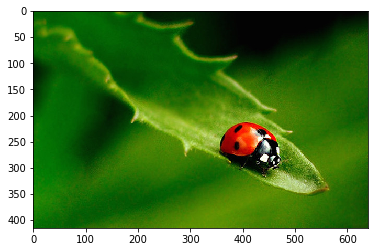

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Load image
image = cv2.imread('C:/Users/jeanjules.bigeard/OneDrive - Neato Robotics/Documents/cocci.jpg')

# Change RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

In [3]:
# Reshape into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))

# Convert to float 
pixel_vals = np.float32(pixel_vals)

# Using K-Means on the image

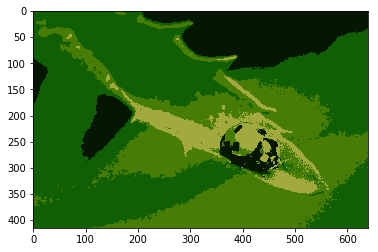

In [12]:
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# then perform k-means clustering
k = 4
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image 
segmented_image = segmented_data.reshape((image.shape))
labels_reshape = labels.reshape(image.shape[0], image.shape[1])

plt.imshow(segmented_image)

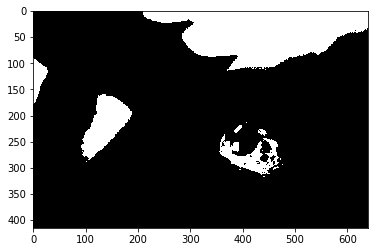

In [16]:
plt.imshow(labels_reshape==0, cmap='gray')

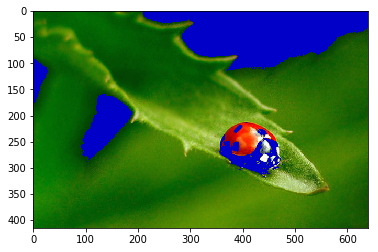

In [17]:
# Using a mask on the first cluster
cluster = 0 

masked_image = np.copy(image)
masked_image[labels_reshape == cluster] = [0, 0, 200]

plt.imshow(masked_image)